# K- Nearest Neighbors

## Classification

Counter({'single-family home': 487, 'condo': 104, 'townhouse': 31, 'lot or land': 11})


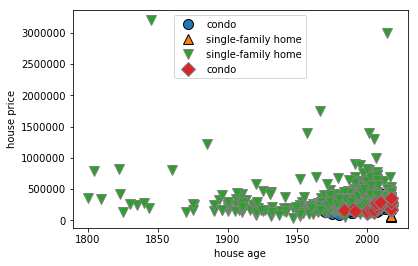

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import pandas
import numpy as np
import mglearn
from collections import Counter


df = pandas.read_excel('house_price_label.xlsx')
# combine multipl columns into a 2D array
# also convert the integer data to float data
X = np.column_stack((df.built_in.astype(float),df.price.astype(float))) 

y = df.house_type
print (Counter(y))

# for classification, make sure a stratify splitting method is selected
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.3,stratify = y, random_state=0) 
mglearn.discrete_scatter(X[:,0],X[:,1],y) # use mglearn to visualize data

plt.legend(y,loc='best')
plt.xlabel('house age')
plt.ylabel('house price')
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print("Training set accuracy: {:.2f}".format(clf.score(X_train, y_train)))
print ("Training Kappa: {:.3f}".format(cohen_kappa_score(y_train,clf.predict(X_train))))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
print ("Test Kappa: {:.3f}".format(cohen_kappa_score(y_test,clf.predict(X_test))))

Training set accuracy: 0.86
Training Kappa: 0.618
Test set accuracy: 0.76
Test Kappa: 0.279


Counter({'single-family home': 490, 'condo': 100, 'townhouse': 32, 'lot or land': 11})
Counter({'single-family home': 554, 'condo': 73, 'lot or land': 6})
Counter({'single-family home': 633})


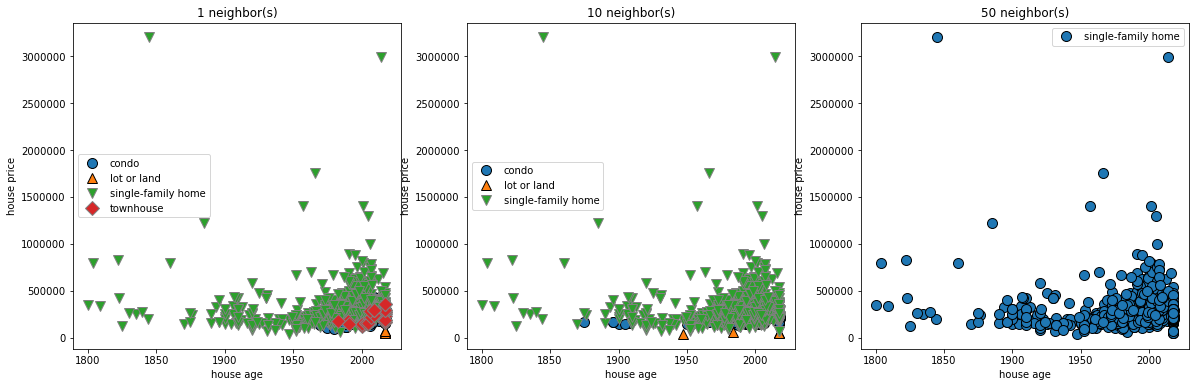

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for n_neighbors, ax in zip([1, 10, 50], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], clf.predict(X), ax=ax)
    print(Counter(clf.predict(X)))
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("house age")
    ax.set_ylabel("house price")
axes[0].legend()
axes[1].legend()
axes[2].legend()

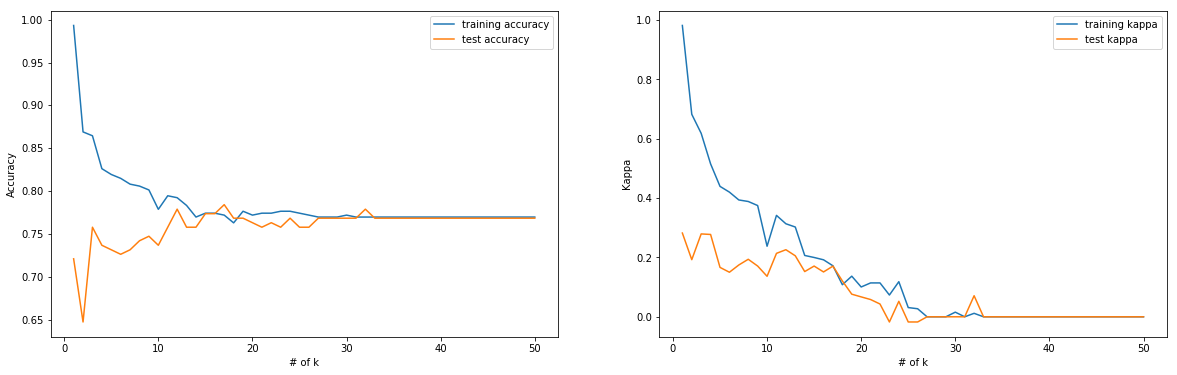

In [5]:
training_accuracy = []
test_accuracy = []
training_kappa = []
test_kappa = []
# try n_neighbors from 1 to 50
neighbors_settings = range(1, 51)
figure, (ax1, ax2)= plt.subplots(1,2,figsize=(20, 6))

for n_neighbors  in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

    # record training set kappa
    training_kappa.append(cohen_kappa_score(y_train,clf.predict(X_train)))
    # record generalization kappa
    test_kappa.append(cohen_kappa_score(y_test,clf.predict(X_test)))

ax1.plot(neighbors_settings, training_accuracy, label="training accuracy")
ax1.plot(neighbors_settings, test_accuracy, label="test accuracy")
ax1.set_xlabel("# of k")
ax1.set_ylabel("Accuracy")
ax1.legend()
ax2.plot(neighbors_settings, training_kappa, label="training kappa")
ax2.plot(neighbors_settings, test_kappa, label="test kappa")
ax2.set_xlabel("# of k")
ax2.set_ylabel("Kappa")
ax2.legend(loc="best")

## Regression

In [6]:
from sklearn.neighbors import KNeighborsRegressor

X = df.area
X = X.values.reshape(-1,1)
y = df.price

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size =0.3)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

print("Training set R^2: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Training set R^2: 0.70
Test set R^2: 0.26


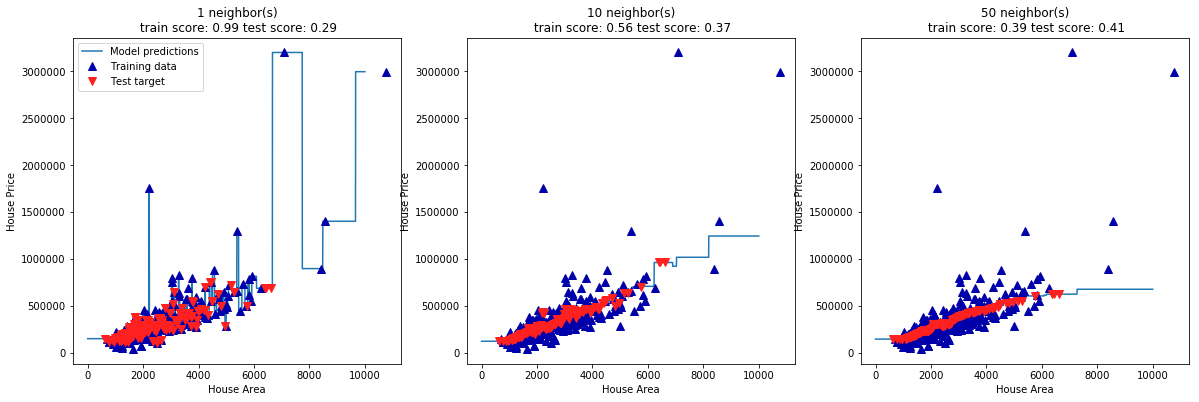

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# create 1,0000 data points, evenly spaced between 0 and 10000
line = np.linspace(0, 10000, 10000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 10, 50], axes):
    # make predictions using 1, 10, or 50 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, reg.predict(X_test), 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("House Area")
    ax.set_ylabel("House Price")
axes[0].legend(["Model predictions", "Training data",
                "Test target"], loc="best")